# Begin by importing the neccessary packages


In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
import nltk # for text and setiment analysis
import nltk, re, pprint
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from stop_words import get_stop_words  # to get 'meat' of words in project names
from nltk.corpus import stopwords
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

# Read in the Kickstarter data

In [2]:
ks = pd.read_csv('/Users/hannah1ross/Desktop/dataforgood/data/ks-projects-201801.csv')
ks.dropna(inplace = True)

ks.head(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00


# What are the most common words are in Kickstarter project names?

### • To inspect the common words in kickstart project names, we will make a word cloud of words in project names.

### • First, we will collect a list of every project name, and we will collect a string/text consisting of all words in every project name.

In [3]:
names_list = [title for title in ks['name']] # a list where each item is a project name from out data set

all_names_text = ' '.join(names_list)

all_names_text[0:200] # we see that now we have converted all project names into one continious body of text ( one string of text)

'The Songs of Adelaide & Abullah Greeting From Earth: ZGAC Arts Capsule For ET Where is Hank? ToshiCapital Rekordz Needs Help to Complete Album Community Film Project: The Art of Neighborhood Filmmakin'

### • Now define a function that will produce a word cloud given a string/body of text

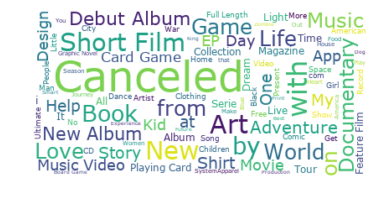

In [4]:
def generate_wordcloud(text): 
    wordcloud = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                          #relative_scaling = 1.0,
                          max_font_size=50, max_words=100, background_color="white",
                          stopwords = {'to', 'of','the','for','in','and','a','an','project'} # exclude project, and do not count common words
                          ).generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

generate_wordcloud(all_names_text) # word cloud for all names of projects

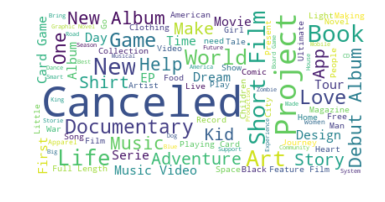

In [5]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(all_names_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Surpringly, 'Canceled' is the largest word. Why? Lets investigate further to see why 'Canceled' could be the most commonly occuring word in project names. 

### • Extract all of the project names that have the word 'canceled' in them

In [6]:
keep_with_c = []
for i in range(len(names_list)):
    sent_words = word_tokenize(names_list[i])
    if "Canceled" in sent_words:
        keep_with_c.append(names_list[i])

### •  Inspect some of these project names including the word 'canceled'.

In [7]:
keep_with_c[0:12] # take a peak

['STUDIO IN THE SKY - A Documentary Feature Film (Canceled)',
 'Raise the Woof, expanding the love (Canceled)',
 'Glyscian Debut Album Recording (Canceled)',
 'Fishtacular - The Ultimate Fishing Tool (Canceled)',
 'The JANIS JOPLIN Project (Canceled)',
 'Objecthood: A Story of an Imagined Economy (Canceled)',
 'Mutant Plants: A Guide (Canceled)',
 'Danger!  Extreme Lawn Darts (Canceled)',
 'The Project Unknown (Canceled)',
 'Riposte (Canceled)',
 'TimeChat™ (Canceled)',
 'Audience of Death (Canceled)']

## It seems like project names have an appended '(Canceled)'. We assume that this means the project has been canceled, but we will check the status of these projects to be sure.

In [8]:
'''
canceled_proj = []
for i in range(len(ks.state)):
    cur_state = ks.state[i]
    cur_name = ks.name[i]
    if cur_state == 'canceled':
        canceled_proj.append(cur_name)
'''
        

"\ncanceled_proj = []\nfor i in range(len(ks.state)):\n    cur_state = ks.state[i]\n    cur_name = ks.name[i]\n    if cur_state == 'canceled':\n        canceled_proj.append(cur_name)\n"

# There is a mistake indexing row 169 in the data, so we investigate and see that this is because when we removed missing values, we removed row indice 169. Since the indice values jump from 168 to 170, we can not loop and extract indices. 


In [9]:
ks.head(170)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00



### • To fix this, we reindex the data to avoid looping index errors.

In [10]:
ks = ks.reset_index(drop=True)

canceled_proj = []
for i in range(len(ks.state)):  
    cur_state = ks.state[i]
    cur_name = ks.name[i]
    if cur_state == 'canceled':
        canceled_proj.append(cur_name)

## We see below in the list of project names fo projects that have been canceled that not all canceled projects have "(Canceled)" appended to their name, but all projects names with      "(Canceled)" appended to the end of their name are, in fact, canceled.

In [11]:
canceled_proj[0:5] # we see that some of the canceled projects have Canceled appended to their name, but not all of them do

['Community Film Project: The Art of Neighborhood Filmmaking',
 'SPIN - Premium Retractable In-Ear Headphones with Mic',
 'STUDIO IN THE SKY - A Documentary Feature Film (Canceled)',
 'Raise the Woof, expanding the love (Canceled)',
 'Gizbee™ Unlimited Removable Storage for Your Travel Photos']

# Since the appended (Canceled) is not a word indicative of common themes in the projects, we will make another word cloud that excludes this word.

# We susepect that project names may have action words like 'Help' and 'Support', and we expect the word cloud to reflect this.

## • First, we create a new list of project names that excludes project names that contain the word canceled. 



In [12]:
words_in_names = nltk.word_tokenize(all_names_text)

## • To accuractely count word frequency, we convert all words to lower case so that words like "Film" and 'film' are not counted as two different words. 

In [13]:
words_in_names_lower = [word.lower() for word in words_in_names]


## • Next, we want to remove all punctuation.

In [14]:
words_in_names_lower_alpha = [word for word in words_in_names_lower if word.isalpha()]

## •  We remove "canceled" from the text of words.

In [15]:
words_in_names_no_c = [word for word in words_in_names_lower_alpha if word != 'canceled']

## • Lastly, we remove all fluff words by leveraging text analysis tools from Natural Language Tool Kit (remove prepositions, articles, etc.)

In [16]:

stop_words = list(get_stop_words('en'))        
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

meaningful_words_list = []
for word in words_in_names_no_c:
    if not word in stop_words:
        meaningful_words_list.append(word)

meaningful_words_text = ' '.join(meaningful_words_list)

# Now that we have cleaned up the body of words included in project names, we make a new word cloud to see the common "meaningful" words in project names.

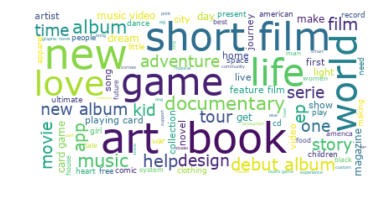

In [17]:
generate_wordcloud(meaningful_words_text)

# From this word cloud, we see that Kickstarter project names contain words that reflect project categories. We suspected that there would be a trend of action words like 'help' and 'support' included in project names, but this visualization does not support this notion.


# From these meaningful words, we can compute a word frequency distribution to see how often each word appears in project names.

In [18]:
fdist = nltk.FreqDist(meaningful_words_list)

# With this frequency distribution, we can queery the occurance of each word by indexing the frequency distribution.

# We wanted to use this to ask: who has more projects, UCLA or USC?

## • We  inspect the frequency distribution to compare how often 'UCLA' and 'USC' appear in Kickstarter project names.

In [19]:
print("UCLA appears in",fdist['ucla'],"Kickstarter project names.")

print("USC appears in", fdist['usc'], "Kickstarter project names.")

UCLA appears in 9 Kickstarter project names.
USC appears in 66 Kickstarter project names.


# UCLA appears in 9 kickstarter project names, and USC appears in 66 Kickstarter project names.

## We inspect to see the Kickstarter project names that include UCLA.

#### • To inspect project names that include these key words, we tokenize the project names into phrases.

In [20]:
ucla_in_name = []
for i in range(len(names_list)):
    sent_words = word_tokenize(names_list[i])
    sent_words = [w.lower() for w in sent_words]
    if "ucla" in sent_words:
        ucla_in_name.append(names_list[i])

ucla_in_name

['C.O.N.C.A. Go to UCLA',
 'Solo exhibitions & Research at UCLA Medical Center & USC',
 '"A Long Day"- A UCLA Graduate Thesis Film',
 'UCLA Bruin Harmony takes on another album!',
 'Shakespeare at UCLA presents Twelfth Night: Or What You Will',
 'UCLA Thesis Preview, Berlin Debut!',
 "Scottie's UCLA Thesis Production",
 'UCLA RT3DA and VR Games Showcase',
 'The Martyr - UCLA 35mm Thesis Film tackling Islamophobia']


# We conducted an analysis of the UCLA Kickstarer projects.

In [21]:
ucla_states = {'project':[],'state':[],'category':[],'main_category':[]}
for i in range(len(ks.name)):
    if ks.name[i] in ucla_in_name:
        cur = ks.name[i]
        ucla_states['project'].append(cur)
        ucla_states['state'].append(ks.state[i])
        ucla_states['category'].append(ks.category[i])
        ucla_states['main_category'].append(ks.main_category[i])

ucla_states = pd.DataFrame(ucla_states)
ucla_states

,project,state,category,main_category
0,C.O.N.C.A. Go to UCLA,failed,Poetry,Publishing
1,Solo exhibitions & Research at UCLA Medical Ce...,successful,Performance Art,Art
2,"""A Long Day""- A UCLA Graduate Thesis Film",failed,Shorts,Film & Video
3,UCLA Bruin Harmony takes on another album!,successful,Music,Music
4,Shakespeare at UCLA presents Twelfth Night: Or...,successful,Theater,Theater
5,"UCLA Thesis Preview, Berlin Debut!",successful,Art,Art
6,Scottie's UCLA Thesis Production,successful,Shorts,Film & Video
7,UCLA RT3DA and VR Games Showcase,successful,Video Games,Games
8,The Martyr - UCLA 35mm Thesis Film tackling Is...,successful,Drama,Film & Video


# How successful are UCLA Kickstarter projects?

In [22]:
ucla_scores=pd.DataFrame(ucla_states.groupby('state')['state'].count())
ucla_scores.columns = ['Number of UCLA Projects']
ucla_scores['Percent of UCLA Projects'] = ucla_scores/ucla_scores['Number of UCLA Projects'].sum()
ucla_scores


,Number of UCLA Projects,Percent of UCLA Projects
state,,
failed,2,0.222222
successful,7,0.777778


In [23]:
labels = list(ucla_scores.index)
values = ucla_scores['Number of UCLA Projects']
values = list(values.values)

trace = go.Pie(labels= list(labels),title='States of UCLA Kickstarter Projects', hole = 0.4,values=values)

py.iplot([trace], filename='basic_pie_chart')

# We can see that UCLA projects have a 77.77% success rate.

# What type of projects are UCLA Kickstarters constituated of?

In [24]:
ucla_maincats=pd.DataFrame(ucla_states.groupby('main_category')['main_category'].count())

ucla_maincats.columns = ['Number of UCLA Projects']

ucla_maincats['Percent of UCLA Projects']= ucla_maincats/ucla_maincats['Number of UCLA Projects'].sum()

ucla_maincats

,Number of UCLA Projects,Percent of UCLA Projects
main_category,,
Art,2,0.222222
Film & Video,3,0.333333
Games,1,0.111111
Music,1,0.111111
Publishing,1,0.111111
Theater,1,0.111111


In [25]:
labels = list(ucla_maincats.index)
values = ucla_maincats['Number of UCLA Projects']
values = list(values.values)

trace = go.Pie(labels= list(labels),title='Categories of UCLA Kickstarter Projects', hole = 0.4,values=values)

py.iplot([trace], filename='basic_pie_chart')

# Over 33% of UCLA's projects are in the Film & Video category.

# Now, lets analyze USC's Kickstarter projects.

In [26]:
usc_in_name = []
for i in range(len(names_list)):
    sent_words = word_tokenize(names_list[i])
    sent_words = [w.lower() for w in sent_words]
    if "usc" in sent_words:
        usc_in_name.append(names_list[i])

pd.DataFrame(usc_in_name)

,0
0,The Process - A USC Thesis Film
1,The History Boys at USC
2,It's Better In Italian - A USC Documentary Thesis
3,"USC Alumnus, Robert Amerson: Making Waves (A S..."
4,Lonely as God - A USC Thesis Film
5,TEN THOUSAND MILES - A USC Thesis Film
6,USC Korean Culture Night 2012
7,Reunion: A USC Thesis Film
8,M for Mediocrity : a USC Student Short Film
9,Pocketful of Posy USC Grad Film


In [27]:
usc_states = {'project':[],'state':[],'category':[],'main_category':[]}
for i in range(len(ks.name)):
    if ks.name[i] in usc_in_name:
        cur = ks.name[i]
        usc_states['project'].append(cur)
        usc_states['state'].append(ks.state[i])
        usc_states['category'].append(ks.category[i])
        usc_states['main_category'].append(ks.main_category[i])
        

usc_states=pd.DataFrame(usc_states)

usc_states.head()



,project,state,category,main_category
0,The Process - A USC Thesis Film,successful,Thrillers,Film & Video
1,The History Boys at USC,successful,Plays,Theater
2,It's Better In Italian - A USC Documentary Thesis,successful,Documentary,Film & Video
3,"USC Alumnus, Robert Amerson: Making Waves (A S...",canceled,Rock,Music
4,Lonely as God - A USC Thesis Film,successful,Documentary,Film & Video


## • From just looking at USC project names, it seems like most projects are about films and are afilliated with the Graduate school, but we will inspect further.

# Overall, how successful are USC's Kickstarter projects?



In [28]:
usc_scores = pd.DataFrame(usc_states).groupby('state')['state'].count()

usc_scores = pd.DataFrame(usc_scores)
usc_scores.columns = ['Number of USC Projects']

usc_state_scores = usc_scores
usc_state_scores['Percent of USC Projects'] = pd.DataFrame(usc_scores/ usc_scores['Number of USC Projects'].sum())
usc_state_scores


,Number of USC Projects,Percent of USC Projects
state,,
canceled,4,0.060606
failed,7,0.106061
successful,55,0.833333


In [29]:
labels = usc_state_scores.index
values = usc_state_scores['Number of USC Projects']
values = list(values.values)
trace = go.Pie(labels= list(labels),title='State of USC Kickstarter Projects', hole = 0.4,values=values)

py.iplot([trace], filename='basic_pie_chart')

# About 83% of USC Kickstarter projects are successful.

# What categories make up USC's Kickstarter Projects?

In [30]:
usc_cat=pd.DataFrame(pd.DataFrame(usc_states).groupby('main_category')['main_category'].count())

usc_cat.columns=['Number of USC Projects']
usc_cat['Percent of USC Projects'] = usc_cat['Number of USC Projects']/ usc_cat['Number of USC Projects'].sum()
usc_cat

,Number of USC Projects,Percent of USC Projects
main_category,,
Art,2,0.030303
Film & Video,55,0.833333
Food,1,0.015152
Music,1,0.015152
Theater,7,0.106061


In [31]:

labels = usc_cat.index
values = usc_cat['Number of USC Projects']
values = list(values.values)

trace = go.Pie(labels= list(labels),title='Categories of USC Kickstarter Projects', hole = 0.4,values=values)

py.iplot([trace], filename='basic_pie_chart')

# We see that just over 83% of USC Kickstarter projects are for Film & video.

# So, how does UCLA's Kickstrarter projects compare to USC's? Who fares better?

In [32]:


trace1 = go.Bar(
    x=list(usc_cat.index),
    y=usc_cat['Number of USC Projects'],
    name='USC'
)
trace2 = go.Bar(
    x=list(ucla_maincats.index),
    y=ucla_maincats['Number of UCLA Projects'],
    name='UCLA'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group', title = 'Categories of Kickstarter Projects by University',yaxis = dict(title='Number of Projects'),xaxis=dict(
        title='Category')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

# How does UCLA's success rate compare to USC's?

In [33]:
data = [go.Bar(
            x=usc_scores['Number of USC Projects'],
            y= list(usc_scores.index),
            orientation = 'h',
            name = "USC",marker = dict(color = 'rgb(153, 27, 30)'),
)]
data.append(go.Bar(
            x=ucla_scores['Number of UCLA Projects'],
            y= list(ucla_scores.index),
            orientation = 'h',
            name = 'UCLA',
            marker = dict(color='rgb(50, 132, 191)')
))


py.iplot(data,layout = layout, filename='horizontal-bar')

# USC has more successful Kickstarter projects than UCLA does, but they also have more failed projects. This is a reflection of the fact that USC has an overall higher number of Kickstarter projects than UCLA does. It is worth noting, however, that USC has four canceled projects, while UCLA does not have any. 

# We will take this opprtunity to point out how even on online platforms like Kickstarter, UCLA Bruins maintain our True Bruin values like Integrity and Accountability. 

# While four of the Trojans' projects were abandoned, not one Bruin project was quit on. Even if they were not to be successful, every UCLA Kickstarter project was seen through to its end. Go Bruins!





# To get a distrubtion of phrases rather than key words, we can use fdist on the list of project names.

In [34]:
lower_names_list = [name.lower() for name in names_list]
clean_lower_names_list = [name for name in lower_names_list if 'canceled' not in name] 

fdist2 = nltk.FreqDist(clean_lower_names_list)

# Here are the Top 10 most common phrases in project names

In [35]:
fdist2.most_common()[:10]

[('new ep/music development', 13),
 ('music video', 12),
 ('the journey', 10),
 ('new ep / music development', 10),
 ('my first album', 10),
 ('debut album', 10),
 ('the other side', 9),
 ('choices', 9),
 ("a midsummer night's dream", 9),
 ('reflections', 9)]

# Here are some of the least common phrases in project names.

In [36]:
fdist2.most_common()[-10:]

[('colorado international activism film festival', 1),
 ('date seat - boston ios app', 1),
 ('at the beach', 1),
 ('beach wrestling documentary', 1),
 ('islanda', 1),
 ('homemade fresh dog food, cleveland oh', 1),
 ('the tribe', 1),
 ('walls of remedy- new lesbian romantic comedy feature unlike any other!!',
  1),
 ('biodefense education kit', 1),
 ('nou renmen ayiti!  we love haiti!', 1)]